Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [25]:
PYTHONOPTIMIZE=1

In [26]:
from random import random, seed
from itertools import product, accumulate
import numpy as np
from matplotlib import pyplot as plt

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [58]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10_000
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

T_MAX = 500
# BUFFER_SIZE = []

In [59]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [29]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype = np.all(np.logical_or.reduce(SETS[solution]))
    return phenotype

# instead of (V/nV, -cost), (#covered, -cost) and maximize covered and after minimize cost
def cardinality(solution):
    phenotype = np.logical_or.reduce(SETS[solution])
    return np.sum(phenotype)

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

#added here the fitness function for clarity
def fitness(solution: np.ndarray):
    return (cardinality(solution), -cost(solution))

## Have Fun!

In [30]:
def single_mutation(solution: np.ndarray) -> np.ndarray:
    new_solution = solution.copy()
    index = rng.integers(0, NUM_SETS)
    new_solution[index] = not new_solution[index]
    return new_solution

def multiple_mutation(solution: np.ndarray) -> np.ndarray:
    # we want to select a random bit and change it
    mask = rng.random(NUM_SETS) < 0.01 # 1% of the bits will be flipped
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True # at least one bit true
    new_solution = np.logical_xor(solution, mask)
    return new_solution

def strong_multiple_mutation(solution: np.ndarray, temp: int) -> np.ndarray:
    # we want to select a random bit and change it
    alpha = 0.1/T_MAX # crop scaling factor based on the value of T_MAX, to have a maximum mask who flips 10% of the bits ( with a 10_000 universe size it is 100 bits )
    mask = rng.random(NUM_SETS) < temp*alpha
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True # at least one bit true
    new_solution = np.logical_xor(solution, mask)
    return new_solution

## Hill Climbing with single mutation

ic| sol_fitness: (np.int64(100000), np.float64(-251206842.0293064))
ic| fitness(solution): (np.int64(100000), np.float64(-1960049.5349375294))
    last_step: 97849


((np.int64(100000), np.float64(-1960049.5349375294)), 97849)

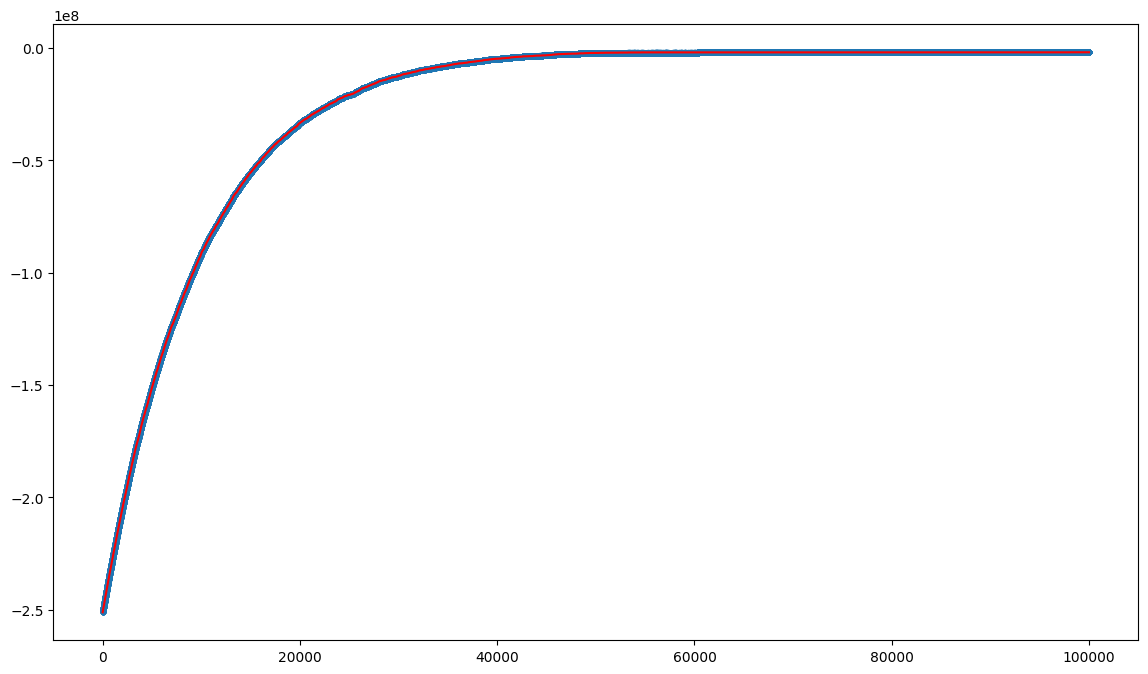

In [61]:
## Hill Climbing with single mutation
solution = rng.random(NUM_SETS) < 1
sol_fitness = fitness(solution)
ic ( sol_fitness)
history = [sol_fitness[1]]

tweak = single_mutation
last_step = 0

for steps in range(100_000):
    new_solution = tweak(solution)
    new_fitness = fitness(new_solution)
    history.append(new_fitness[1])
    
    if new_fitness > sol_fitness:
        solution = new_solution
        sol_fitness = new_fitness
        last_step = steps

plt.figure(figsize=(14,8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color='red'
)
_ = plt.scatter(range(len(history)), history, marker='.')

ic (fitness(solution), last_step)

## Hill Climbing with multiple mutation

ic| sol_fitness: (

np.int64(10000), np.float64(-3412331.9902000846))
ic| fitness(solution): (np.int64(10000), np.float64(-598021.1771574044))
    last_step: 9935


((np.int64(10000), np.float64(-598021.1771574044)), 9935)

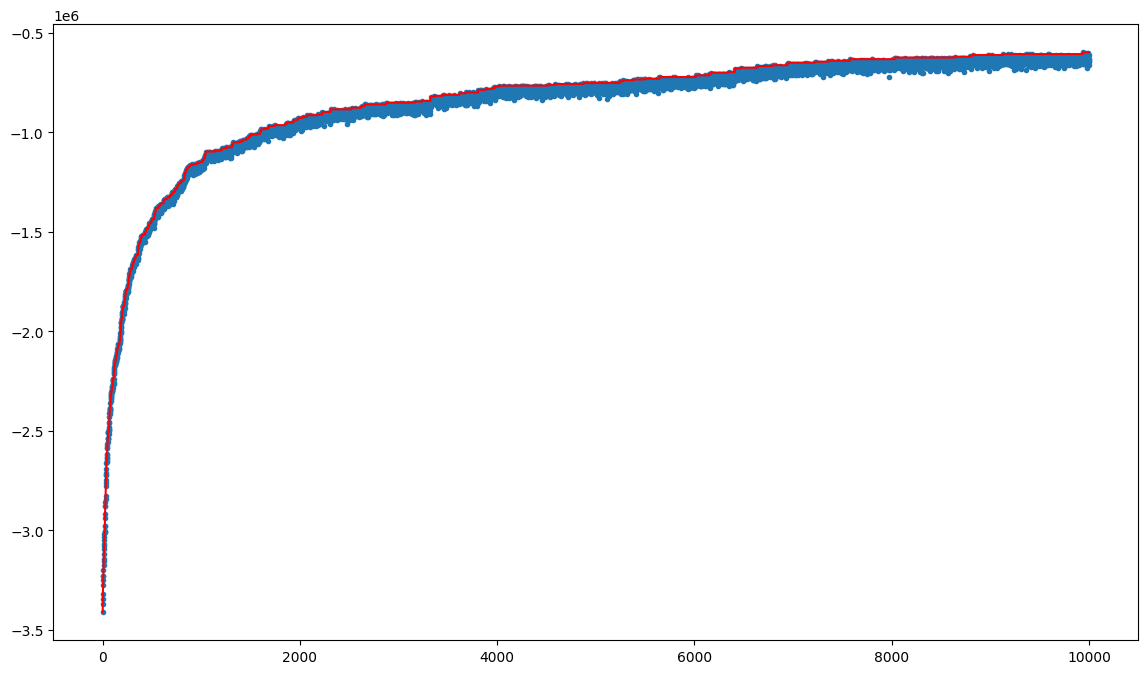

In [51]:
solution = rng.random(NUM_SETS) < 0.8
sol_fitness = fitness(solution)
ic ( sol_fitness)
history = [sol_fitness[1]]

tweak = multiple_mutation
last_step = 0

for steps in range(10_000):
    new_solution = tweak(solution)
    new_fitness = fitness(new_solution)
    history.append(new_fitness[1])
    
    if new_fitness > sol_fitness:
        solution = new_solution
        sol_fitness = new_fitness
        last_step = steps

plt.figure(figsize=(14,8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color='red'
)
_ = plt.scatter(range(len(history)), history, marker='.')

ic (fitness(solution), last_step)

## Hill Climbing with Simulated Annealing

ic| sol_fitness: (np.int64(10000), np.float64(-

3447370.717554112))
ic| fitness(solution): (np.int64(10000), np.float64(-2073342.865381773))
    last_step: 9999


((np.int64(10000), np.float64(-2073342.865381773)), 9999)

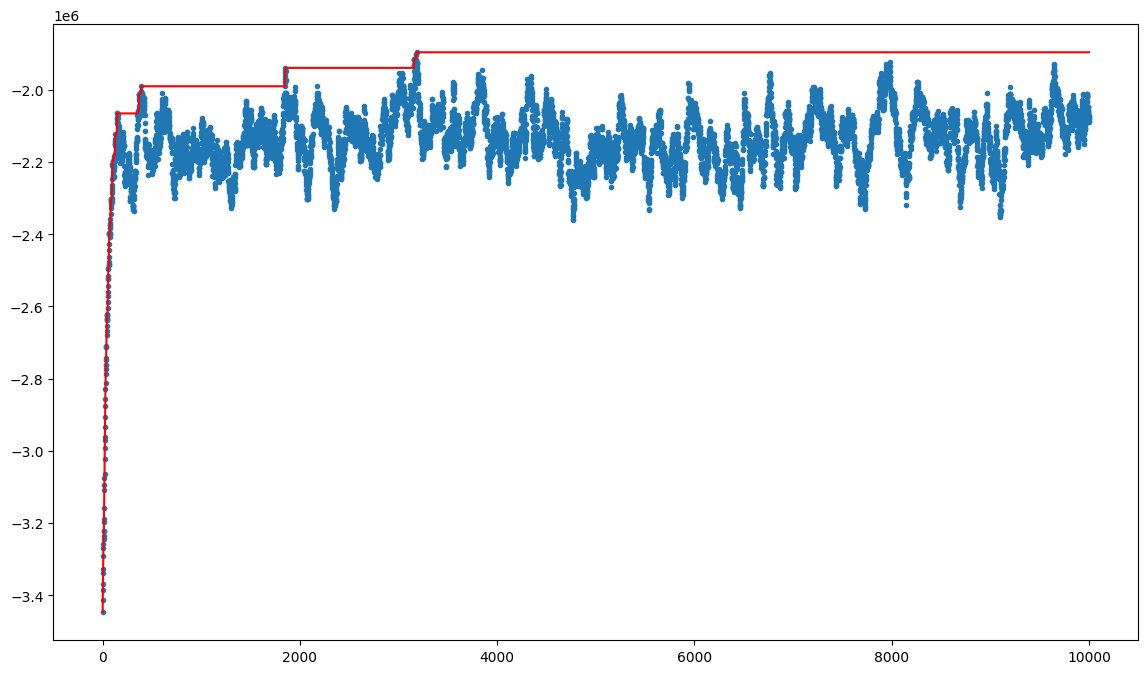

In [52]:
# Hill Climbing with Simulated Annealing ( to be implemented )
solution = rng.random(NUM_SETS) < 0.8
sol_fitness = fitness(solution)
ic ( sol_fitness)
history = [sol_fitness[1]]

temperature = T_MAX

tweak = multiple_mutation
last_step = 0

for steps in range(10_000):
    new_solution = tweak(solution)
    new_fitness = fitness(new_solution)
    history.append(new_fitness[1])

    delta = sol_fitness[1] - new_fitness[1]
    p = 1/(1 + np.exp(-delta / temperature))

    # generate a random value in the interval [0, 1]
    if  np.random.randint(0, 1) < p:
        solution = new_solution
        sol_fitness = new_fitness
        last_step = steps

plt.figure(figsize=(14,8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color='red'
)
_ = plt.scatter(range(len(history)), history, marker='.')

ic (fitness(solution), last_step)

## Hill Climbing with Simulated Annealing and Self-Adapting parameter

Pseudocode:
- Starting from an initial random solution, perform internal steps: if by the end you improve the solution, update best_sol and decrease the temperature by a proportional factor
- In the next iteration, move with a tweak that obviously varies based on the temperature, and internally repeat the steps and the check of best_sol
- As the algorithm progresses, T (temperature) decreases each time best_sol is improved, thereby promoting exploitation; however, if after a series of steps there is no improvement in the best solution, the temperature increases again to encourage exploration

ic| sol_fitness: (np.int64(10000), np.float64(-2114431.203996144))
ic| fitness(best_solution): (np.int64(10000), np.float64(-1866183.7001088653))
    last_step: 4434


((np.int64(10000), np.float64(-1866183.7001088653)), 4434)

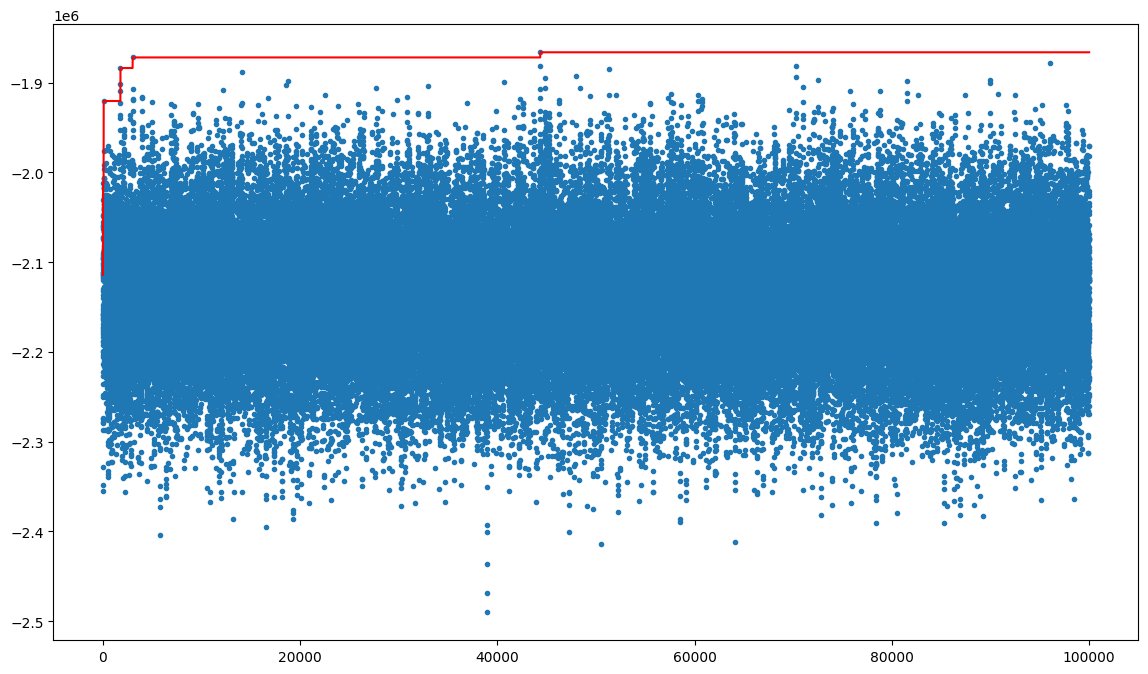

In [49]:
# Hill Climbing with Simulated Annealing ( to be implemented )
curr_solution = rng.random(NUM_SETS) < .5
sol_fitness = fitness(curr_solution)
ic ( sol_fitness)
history = [sol_fitness[1]]

temperature = T_MAX
internal_steps = 10 
last_step = 0
buffer = list()

tweak = strong_multiple_mutation
best_solution = curr_solution

for steps in range(10_000):

    for internal in range(internal_steps):
        # aggiungere parametro per regolare exploration/exploitation
        new_solution = tweak(curr_solution, temperature)
        new_fitness = fitness(new_solution)
        history.append(new_fitness[1])

        delta = sol_fitness[1] - new_fitness[1]
        p = 1/(1 + np.exp(-delta/temperature))

        if  np.random.randint(0, 1) < p:
            curr_solution = new_solution
            sol_fitness = new_fitness
            if len(buffer) == 0 or sol_fitness > buffer[-1][1]:
                buffer.append((curr_solution, sol_fitness)) 

    if len(buffer) == 0 or sol_fitness > buffer[-1][1]:
        temperature = (T_MAX/100) if temperature == T_MAX/1000 else temperature + T_MAX/100
    # if buffer[-1][1] >= fitness(best_solution):
    elif buffer[-1][1] >= fitness(best_solution):
        best_solution = buffer[-1][0]
        curr_solution = best_solution
        last_step = steps
        temperature = (temperature - T_MAX/100) if temperature > T_MAX/100 else T_MAX/1000
        
    buffer.clear()


plt.figure(figsize=(14,8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color='red'
)
_ = plt.scatter(range(len(history)), history, marker='.')

ic (fitness(best_solution), last_step)